# **Práctica 2: Web Scraping en Páginas Amarillas**

**Práctica elaborada por:** Qiqi Zhou e Iván González

## **Parte 1:** Extracción y depurado de la información

### Selección de la página web

El **objetivo** de esta práctica es **extraer información** de los anuncios publicados en la página web de **Páginas Amarillas**. En esta primera sección, pedimos al usuario que interactúe con **tres campos**: por un lado, que introduzca la **categoría de búsqueda** (e.j. Restaurantes) y su **ubicación** (e.j. Alicante), y, por otro, que seleccione el **número máximo de páginas** dentro del portal de anuncios de las cuales se desea extraer la información. Una vez introducidas, se almacenan en variables para su inserción en los **campos de búsqueda** del sitio web. 

In [8]:
import pandas as pd
import sys
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs

In [2]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

# Pedimos al usuario que introduzca la categoría de búsqueda y la ubicación sobre las cuales desea almacenar información. Además, también se le pregunta sobre el número máximo de páginas.
category = input("Introduzca la categoría de búsqueda sobre la cual desea almacenar información: ")
location = input("Introduzca la ubicación de la categoría de búsqueda sobre la cual desea almacenar información: ")
pages = input("Introduzca el número máximo de páginas sobre las que desea retener información. Tenga en cuenta que el tiempo de procesado por página (30 anuncios) ronda los 5 minutos: ")

# Accedemos a la página web. En nuestro caso a Páginas Amarillas, un portal del anuncios para toda clase de establecimientos
driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://www.paginasamarillas.es"          
driver.get(url)

# Guardamos los campos de búsqueda para la categoría del establecimiento y su localización
category_serch = driver.find_element(By.ID, "whatInput")
location_search = driver.find_element(By.ID, "where")

# Introducimos en los campos de búsqueda la categoría y la localización a preferencia del usuario
category_serch.send_keys(category)  
location_search.send_keys(location)  
location_search.send_keys(Keys.ENTER)
time.sleep(5)

KeyboardInterrupt: 

### Almacenaje de la información

En esta sección se **almacena la información disponible de cada anuncio**. En concreto, nos quedamos con el **nombre** del establecimiento, **categoría**, **actividad**, **descripción**, **servicios**, **teléfono**, **dirección**, **código postal**, **provincia**, **métodos de pago**, **redes sociales**, **información financiera**, **horario**, y **número de estrellas** a nivel de valoraciones. Para ello, vamos recorriendo con un bucle los diferentes anuncios y vamos extrayendo la información a través de los **XPath** de los elementos en el código html de la página web. La longitud del bucle la determina el número de páginas que haya seleccionado previamente el usuario.

In [26]:
# Creamos las listas en donde almacenaremos la información que queremos extraer
local_name = []
local_category = []
local_type = []
local_descrip = []
local_service = []
local_tel = []
local_dir = []
local_cp = []
local_prov = []
local_url = []
local_price = []
local_pm = []
local_facebook = []
local_instagram = []
local_twitter = []
local_maps = []
local_finance = []
local_schedule = []
local_stars = []

In [ ]:
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException

# Bucle sobre el número máximo de páginas que ha definido previamente el usuario
for page in range(0, int(pages)):
    time.sleep(3)

    try:
        # Generamos la lista de links y de categorías de la página
        link = driver.find_elements(By.CLASS_NAME, "mas-info")
        category = driver.find_elements(By.CSS_SELECTOR, ".business-icon")

        for url, cat in zip(range(0,(len(link))), range(0,(len(category)))):
            print(url)

            # Primero obtenemos la categoría general del establecimiento de la página principal
            category = driver.find_elements(By.CSS_SELECTOR, ".business-icon")
            class_cat = category[cat].get_attribute("class")
            print(class_cat)
            local_category.append(class_cat)

            # Empezamos a acceder a los distintos anuncios de la página principal
            link = driver.find_elements(By.CLASS_NAME, "mas-info")
            link[url].click()
            time.sleep(5)

            try:
                # Nombre del establecimiento
                name = driver.find_element(By.XPATH, ".//h1[@class = 'mt-3 line-fluid']").text
                print(name)
                local_name.append(name)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_name.append("NULL")
                pass

            try:
                # Especialidad del establecimiento
                type = driver.find_element(By.XPATH, ".//div[@class = 'actividades p-3 ']").text
                print(type)
                local_type.append(type)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_type.append("NULL")
                pass
            
            try:
                # Descripción básica del establecimiento
                descrip = driver.find_element(By.XPATH, ".//div[@class = 'line-fluid']").text
                print(descrip)
                local_descrip.append(descrip)
            
            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_descrip.append("NULL")
                pass
            
            try:
                # Servicios del establecimiento
                service = driver.find_element(By.XPATH, ".//div[@class = 'servicios p-3 ']").text
                print(service)
                local_service.append(service)
            
            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_service.append("NULL")
                pass
            
            try:
                # Teléfono del establecimiento
                tel = driver.find_element(By.XPATH, ".//span[@class = 'telephone']").text
                print(tel)
                local_tel.append(tel)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_tel.append("NULL")
                pass

            try:
                # Dirección postal del establecimiento
                dir = driver.find_element(By.XPATH, ".//span[@itemprop = 'streetAddress']").text
                print(dir)
                local_dir.append(dir)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_dir.append("NULL")
                pass

            try:
                # Código postal del establecimiento
                cp = driver.find_element(By.XPATH, ".//span[@itemprop = 'postalCode']").text
                print(cp)
                local_cp.append(cp)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_cp.append("NULL")
                pass

            try:
                # Provincia del establecimiento
                prov = driver.find_element(By.XPATH, ".//span[@itemprop = 'addressLocality']").text
                print(prov)
                local_prov.append(prov)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_prov.append("NULL")
                pass
            
            try:
                # Direccion URL de la web del establecimiento
                url = driver.find_element(By.XPATH, ".//a[@class = 'sitio-web']").get_attribute("title")
                print(url)
                local_url.append(url)
            
            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_url.append("NULL")
                pass
            
            try:
                # Precio medio de los servicios del establecimiento
                price = driver.find_element(By.XPATH, ".//div[@class = 'precio-medio mt-3']").text
                print(price)
                local_price.append(price)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_price.append("NULL")
                pass
            
            try:
                # Métodos de pago del establecimiento
                pm = driver.find_element(By.XPATH, ".//ul[@class = 'l-inline m-payment-methods']").text
                print(pm)
                local_pm.append(pm)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_pm.append("NULL")
                pass
            
            try:
                # Facebook del establecimiento
                facebook = driver.find_element(By.XPATH, ".//a[@data-omniclick = 'rrss|Facebook']").get_attribute("href")
                print(facebook)
                local_facebook.append(facebook)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_facebook.append("NULL")
                pass

            try:
                # Instagram del establecimiento
                instagram = driver.find_element(By.XPATH, ".//a[@data-omniclick = 'rrss|Instagram']").get_attribute("href")
                print(instagram)
                local_instagram.append(instagram)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_instagram.append("NULL")
                pass

            try:
                # Twitter del establecimiento
                twitter = driver.find_element(By.XPATH, ".//a[@data-omniclick = 'rrss|Twitter']").get_attribute("href")
                print(twitter)
                local_twitter.append(twitter)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_twitter.append("NULL")
                pass

            try:
                # Google Maps del establecimiento
                maps = driver.find_element(By.XPATH, ".//a[@data-omniclick = 'rrss|Google+']").get_attribute("href")
                print(maps)
                local_maps.append(maps)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_maps.append("NULL")
                pass
            
            try:
                # Información financiera del establecimiento
                finance = driver.find_element(By.XPATH, ".//div[@class = 'axesor p-3 ']").text
                print(finance)
                local_finance.append(finance)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_finance.append("NULL")
                pass
            
            try:
                # Horario de apertura del establecimiento
                driver.find_element(By.XPATH, ".//a[@class = 'mb-3 horario-toggler']").click()
                time.sleep(3)
                schedule = driver.find_element(By.XPATH, ".//div[@id = 'horario']").text
                print(schedule)
                local_schedule.append(schedule)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_schedule.append("NULL")
                pass
            
            try:
                # Estrellas del establecimiento
                stars = driver.find_element(By.XPATH, ".//span[contains(@class, 'stars')]").get_attribute("class")
                print(stars)
                local_stars.append(stars)

            except (StaleElementReferenceException, NoSuchElementException):
                print("NULL")
                local_stars.append("NULL")
                pass

            driver.back()
            time.sleep(5)
        
        driver.find_element(By.XPATH, ".//i[@class = 'fa icon-flecha-derecha']").click()

    except (StaleElementReferenceException, NoSuchElementException):
        if page == 0:
            print("\nNo se encontraron más resultados para la búsqueda especificada.")
        else:
            print("\nEl número de páginas seleccionadas es superior al número máximo de páginas para su búsqueda. Ya se ha recogido toda la información disponible.")
        break

### Modificación de los datos y creación del dataframe

En esta sección **modificamos y depuramos** la información extraída quedándonos únicamente con lo relevante. Tras ello, introducimos los datos en un **dataframe** para su posterior inserción en la **base de datos de MySQL**.

In [28]:
# Chequeamos la información almacenada. Tendremos que tratar la información antes de almacenarla en un dataframe
print(local_name)
print(local_category)
print(local_type)
print(local_descrip)
print(local_service)
print(local_tel)
print(local_dir)
print(local_cp)
print(local_prov)
print(local_url)
print(local_price)
print(local_pm)
print(local_facebook)
print(local_instagram)
print(local_twitter)
print(local_maps)
print(local_finance)
print(local_schedule)
print(local_stars)

['RESTAURANTE LA ALMADRABA\nAlacant/Alicante', 'Restaurante Cervecería Castell\nAlacant/Alicante', 'Entre Bambalinas\nAlacant/Alicante', 'Asador Mendoza\nAlacant/Alicante', 'Restaurante La Matanza Castellana\nAlacant/Alicante', 'Valencia Once Restaurante\nAlacant/Alicante', 'Rincon de la Amistad\nAlacant/Alicante', 'Restaurante Los Pacos\nAlacant/Alicante', 'Restaurante Punta Cana\nAlacant/Alicante', 'Restaurante Reinas\nAlacant/Alicante', 'Restaurante Indio Taj-Mahal\nAlacant/Alicante', 'C&C AGENTES CB\nAlicante/Alacant', 'Pizzeria Caruso\nAlacant/Alicante', 'Bar Cafetería Oasis Latinos\nAlacant/Alicante', 'Bodhigreen Vegetariano\nAlacant/Alicante', 'La Sastrería\nAlacant/Alicante', 'Restaurante El Mayoral\nAlacant/Alicante', 'EL FRANCES\nAlicante/Alacant', 'Ginos Ristorante\nAlacant/Alicante', 'LOS PESCADORES\nAlacant/Alicante', 'MAESTRAL\nAlicante/Alacant', 'Pollos San Gabriel\nAlacant/Alicante', 'CASA FILO\nAlacant/Alicante', 'LA TAGLIATELLA\nAlacant/Alicante', 'MEI LI HUA\nAlacant

In [33]:
# Mantenemos únicamente la razón social del establecimiento con la primera letra de cada palabra en mayúscula
Nombre = [i.split('\n')[0].title() for i in local_name]

# Nos quedamos únicamente con la categoría con la primera letra de cada palabra en mayúscula
Categoría = [i.replace('-', ' ').title() for i in local_category]
Categoría = [i.split('  ')[1] for i in Categoría]

# Nos quedamos únicamente con la actividad
Actividad = [i.split('\n')[1].capitalize() for i in local_type]

# Dividiremos los servicios en cinco columnas únicamente. Los servicios que vayan más allá se eliminarán para no saturar el modelo
diccionario = {}

for i, elemento in enumerate(local_service):
    partes = elemento.split('\n')
    for j, parte in enumerate(partes):
        diccionario.setdefault(j+1, []).append(parte)
    for k in range(len(partes)+1, 7):
        diccionario.setdefault(k, []).append("NULL")

Trash = diccionario.get(1, [])
Servicio_1 = diccionario.get(2, [])
Servicio_2 = diccionario.get(3, [])
Servicio_3 = diccionario.get(4, [])
Servicio_4 = diccionario.get(5, [])
Servicio_5 = diccionario.get(6, [])

# Nos quedaremos únicamente con la cantidad monetaria en euros
Precio_medio = []
for i in local_price:
    partes = i.split(': ')
    if len(partes) > 1:
        Precio_medio.append(partes[1])
    else:
        Precio_medio.append("NULL")

# Dividiremos los métodos de pago en cinco columnas únicamente. Los métodos de pago que vayan más allá se eliminarán para no saturar el modelo
diccionario = {}

for i, elemento in enumerate(local_pm):
    partes = elemento.split('\n')
    for j, parte in enumerate(partes):
        diccionario.setdefault(j+1, []).append(parte)
    for k in range(len(partes)+1, 6):
        diccionario.setdefault(k, []).append("NULL")

Pago_1 = diccionario.get(1, [])
Pago_2 = diccionario.get(2, [])
Pago_3 = diccionario.get(3, [])
Pago_4 = diccionario.get(4, [])
Pago_5 = diccionario.get(5, [])

# Dividiremos la información financiera en seis columnas: fecha de constitución, forma social, CNAE, rango nº empleados, rango de facturación y rango del capital social
diccionario = {}

for i, elemento in enumerate(local_finance):
    partes = elemento.split('\n')
    for j, parte in enumerate(partes):
        diccionario.setdefault(j+1, []).append(parte)
    for k in range(len(partes)+1, 8):
        diccionario.setdefault(k, []).append("NULL")

Trash = diccionario.get(1, [])
F_const = diccionario.get(2, [])
F_social = diccionario.get(3, [])
CNAE = diccionario.get(4, [])
Num_empleados = diccionario.get(5, [])
Facturación = diccionario.get(6, [])
Cap_social = diccionario.get(7, [])

## Nos quedaremos únicamente con la información, no con el título
F_const = [i.split(': ')[1] if ':' in i else "NULL" if i != "NULL" else "NULL" for i in F_const]
F_social = [i.split(': ')[1].title() if ':' in i else "NULL" if i != "NULL" else "NULL" for i in F_social]
CNAE = [i.split(': ')[1] if ':' in i else "NULL" if i != "NULL" else "NULL" for i in CNAE]
Num_empleados = [i.split(': ')[1] if ':' in i else "NULL" if i != "NULL" else "NULL" for i in Num_empleados]
Facturación = [i.split(': ')[1] if ':' in i else "NULL" if i != "NULL" else "NULL" for i in Facturación]
Cap_social = [i.split(': ')[1] if ':' in i else "NULL" if i != "NULL" else "NULL" for i in Cap_social]


# Dividiremos el horario en siete columnas: Lunes, Martes, Miércoles, Jueves, Viernes, Sábado y Domingo
diccionario = {}

for i, elemento in enumerate(local_schedule):
    partes = elemento.split('\n')
    for j, parte in enumerate(partes):
        diccionario.setdefault(j+1, []).append(parte)
    for k in range(len(partes)+1, 8):
        diccionario.setdefault(k, []).append("NULL")

Lunes = diccionario.get(1, [])
Martes = diccionario.get(2, [])
Miércoles = diccionario.get(3, [])
Jueves = diccionario.get(4, [])
Viernes = diccionario.get(5, [])
Sábado = diccionario.get(6, [])
Domingo = diccionario.get(7, [])

## Nos quedaremos únicamente con la información, no con el día de la semana
for i in range(len(Lunes)):
    Lunes[i] = Lunes[i].replace('Lunes ', '')
for i in range(len(Martes)):
    Martes[i] = Martes[i].replace('Martes ', '')
for i in range(len(Miércoles)):
    Miércoles[i] = Miércoles[i].replace('Miércoles ', '')
for i in range(len(Jueves)):
    Jueves[i] = Jueves[i].replace('Jueves ', '')
for i in range(len(Viernes)):
    Viernes[i] = Viernes[i].replace('Viernes ', '')
for i in range(len(Sábado)):
    Sábado[i] = Sábado[i].replace('Sábado ', '')
for i in range(len(Domingo)):
    Domingo[i] = Domingo[i].replace('Domingo ', '')

# Mantenemos únicamente el número de estrellas
Estrellas = [i.split('-')[1] for i in local_stars]
Estrellas = [i.split(' ')[0] for i in Estrellas]
Estrellas = [i + " de 5 estrellas" for i in Estrellas]

In [35]:
# Transformamos nuestra información almacenada a dataframe
df = pd.DataFrame(zip(Nombre, Categoría, Actividad, local_descrip, Servicio_1, Servicio_2, Servicio_3, Servicio_4, Servicio_5, local_tel, local_dir, local_cp, local_prov, local_url, Precio_medio, 
                      Pago_1, Pago_2, Pago_3, Pago_4, Pago_5, local_facebook, local_instagram, local_twitter, local_maps, F_const, F_social, CNAE, Num_empleados, Facturación, Cap_social, Lunes, 
                      Martes, Miércoles, Jueves, Viernes, Sábado, Domingo, Estrellas), 
                  columns=['Nombre', 'Categoría', 'Actividad', 'Descripción', 'Servicio_1', 'Servicio_2', 'Servicio_3', 'Servicio_4', 'Servicio_5', 'Teléfono', 'Dirección', 'Código_postal', 'Provincia', 'Sitio_web', 'Precio_medio', 
                           'Método_de_pago_1', 'Método_de_pago_2', 'Método_de_pago_3', 'Método_de_pago_4', 'Método_de_pago_5', 'Facebook', 'Instagram', 'Twitter', 'Google_Maps', 'Fecha_de_constitución', 'Forma_social', 'CNAE', 
                           'Número_de_empleados', 'Nivel_de_facturación', 'Capital_social', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo', 'Número_de_estrellas'])

# Creamos adicionalmente algunas columnas ID
df['ID_Establecimiento'] = range(1, len(df) + 1)
df

,Nombre,Categoría,Actividad,Descripción,Servicio_1,Servicio_2,Servicio_3,Servicio_4,Servicio_5,Teléfono,...,Capital_social,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo,Número_de_estrellas,ID_Establecimiento
0,Restaurante La Almadraba,Restaurant,Cocina marinera,"Especialidad en calderos, arroces, pescados, m...",Aire acondicionado,Cafeterías/bares,Salón privado,Terraza/jardín,Calefacción,965970587,...,NULL,10:00-17:00,10:00-17:00,10:00-17:00,10:00-17:00,10:00-17:00,10:00-17:00,10:00-17:00,0 de 5 estrellas,1
1,Restaurante Cervecería Castell,Restaurant,Restaurantes,Especialidad en todo tipo de arroces. Menú dia...,Parking,NULL,NULL,NULL,NULL,965252434,...,NULL,Cerrado,08:00-00:00,08:00-00:00,08:00-00:00,08:00-00:00,08:00-00:00,08:00-00:00,0 de 5 estrellas,2
2,Entre Bambalinas,Restaurant,Restaurantes,Restaurante en Alicante.,NULL,NULL,NULL,NULL,NULL,966962895,...,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,0 de 5 estrellas,3
3,Asador Mendoza,Restaurant,Restaurantes,Especialidad en Carnes a la Brasa y Arroces.\n...,NULL,NULL,NULL,NULL,NULL,966838287,...,0€ - 3.500€,07:00-00:00,07:00-00:00,07:00-00:00,07:00-00:00,07:00-00:00,07:00-00:00,Cerrado,0 de 5 estrellas,4
4,Restaurante La Matanza Castellana,Restaurant,Restaurantes,"La Matanza Castellana, pasión por los platos t...",Aire acondicionado,Calefacción,Parking próximo,NULL,NULL,965218561,...,0€ - 3.500€,Cerrado,12:00-16:30 y 20:00-00:00,12:00-16:30 y 20:00-00:00,12:00-16:30 y 20:00-00:00,12:00-16:30 y 20:00-00:00,12:00-16:30 y 20:00-00:00,12:00-16:30 y 20:00-00:00,0 de 5 estrellas,5
5,Valencia Once Restaurante,Restaurant,Cocina mediterránea,Restaurante tradicional con una extensa carta ...,Aire acondicionado,Acceso discapacitados,NULL,NULL,NULL,686760311,...,0€ - 3.500€,NULL,NULL,NULL,NULL,NULL,NULL,NULL,4 de 5 estrellas,6
6,Rincon De La Amistad,Restaurant,Restaurantes,Disfrute de un ambiente agradable y de una com...,Aire acondicionado,Terraza/jardín,Restaurante climatizado,Menu del dia,Tarjeta de credito,965248483,...,3.500€ - 10.000€,NULL,NULL,NULL,NULL,NULL,NULL,NULL,5 de 5 estrellas,7
7,Restaurante Los Pacos,Restaurant,Cocina mediterránea,Restaurante Los Pacos: especialidades en arroc...,Menu fin de semana,Menu semanal,Menu para grupo,Sala celebracion,Reserva para grupo,965164213,...,NULL,13:30-16:30 y 20:00-00:00,13:30-16:30,Cerrado,13:30-16:30 y 20:00-00:00,13:30-16:30 y 20:00-00:00,13:30-16:30 y 20:00-00:00,13:30-16:30 y 20:00-00:00,0 de 5 estrellas,8
8,Restaurante Punta Cana,Restaurant,Restaurantes,Restaurante especializado en comida dominicana...,NULL,NULL,NULL,NULL,NULL,+34697755663,...,NULL,08:00-00:30,08:00-00:30,08:00-00:30,08:00-00:30,08:00-00:30,08:00-00:30,08:00-00:30,0 de 5 estrellas,9
9,Restaurante Reinas,Restaurant,Cocina mediterránea,Especialistas en arroces y frituras. Atendemos...,NULL,NULL,NULL,NULL,NULL,965150772,...,0€ - 3.500€,11:00-16:00 y 20:00-00:00,11:00-16:00 y 20:00-00:00,11:00-16:00 y 20:00-00:00,11:00-16:00 y 20:00-00:00,11:00-16:00 y 20:00-00:00,11:00-16:00 y 20:00-00:00,11:00-16:00 y 20:00-00:00,0 de 5 estrellas,10


## **Parte 2:** Inserción de la información en la base de datos de MySQL

### Creación de la Base de Datos

In [4]:
# Importamos la librería necesaria
import mysql.connector

In [5]:
# Definimos la configuración de la base de datos
con = mysql.connector.connect(user = "root", password = "130599Ivan", host = "127.0.0.1")
cursor = con.cursor()

In [6]:
# Creamos la base de datos "Páginas Amarillas"
cursor.execute("DROP DATABASE IF EXISTS PAGINAS_AMARILLAS;")
cursor.execute("CREATE DATABASE PAGINAS_AMARILLAS CHARACTER SET utf8mb4;")
cursor.execute("USE PAGINAS_AMARILLAS;")

### Creación de tablas

Tras la creación de la base de datos, comenzamos a **crear las distintas tablas**. Todas estarán **relacionadas** con la **tabla Establecimiento**, que es en la que se encuentra originariamente el **ID** de cada local. En concreto, hemos creado cuatro tablas más: **Tipo_establecimiento**, **Localidad**, **Info_financiera** y **Horario**.

In [39]:
# Tabla "Establecimiento"
cursor.execute("CREATE TABLE IF NOT EXISTS Establecimiento("
                    "`ID_Establecimiento` INT(6) NOT NULL," 
                    "Nombre VARCHAR(100) NOT NULL,"
                    "Categoría VARCHAR(100) NOT NULL," 
                    "Teléfono VARCHAR(20) NULL,"
                    "Sitio_web VARCHAR(1000) NULL,"
                    "CONSTRAINT PK_ID_Est PRIMARY KEY (ID_Establecimiento)"
               ");")

In [40]:
# Tabla "Tipo_establecimiento"
cursor.execute("CREATE TABLE IF NOT EXISTS Tipo_establecimiento("
                    "ID_Establecimiento INT(6) NOT NULL,"
                    "Actividad VARCHAR(100) NOT NULL,"
                    "Descripción VARCHAR(2000) NULL,"
                    "Precio_medio VARCHAR(20) NULL,"
                    "Número_de_estrellas VARCHAR(20) NOT NULL,"
                    "Facebook VARCHAR(100) NULL,"
                    "Instagram VARCHAR(100) NULL,"
                    "Twitter VARCHAR(100) NULL,"
                    "Google_Maps VARCHAR(1000) NULL,"
                    "Servicio_1 VARCHAR(50) NULL,"
                    "Servicio_2 VARCHAR(50) NULL,"
                    "Servicio_3 VARCHAR(50) NULL,"
                    "Servicio_4 VARCHAR(50) NULL,"
                    "Servicio_5 VARCHAR(50) NULL,"
                    "Método_de_pago_1 VARCHAR(50) NULL,"
                    "Método_de_pago_2 VARCHAR(50) NULL,"
                    "Método_de_pago_3 VARCHAR(50) NULL,"
                    "Método_de_pago_4 VARCHAR(50) NULL,"
                    "Método_de_pago_5 VARCHAR(50) NULL,"
                    "CONSTRAINT PK_Tipo_ID_Est PRIMARY KEY (ID_Establecimiento),"
                    "CONSTRAINT FK_Tipo_ID_Est FOREIGN KEY (ID_Establecimiento) REFERENCES Establecimiento(ID_Establecimiento)"
               ");")

In [41]:
# Tabla "Localidad"
cursor.execute("CREATE TABLE IF NOT EXISTS Localidad("
                    "ID_Establecimiento INT(6) NOT NULL," 
                    "Dirección VARCHAR(100) NULL,"
                    "Código_postal INT NULL," 
                    "Provincia VARCHAR(50) NULL,"
                    "CONSTRAINT PK_Localidad_ID_Est PRIMARY KEY (ID_Establecimiento),"
                    "CONSTRAINT FK_Localidad_ID_Est FOREIGN KEY (ID_Establecimiento) REFERENCES Establecimiento(ID_Establecimiento)"
               ");")

In [42]:
# Tabla "Info_financiera"
cursor.execute("CREATE TABLE IF NOT EXISTS Info_financiera("
                    "CNAE VARCHAR(100) NULL,"
                    "ID_Establecimiento INT(6) NOT NULL," 
                    "Fecha_constitución VARCHAR(50) NULL,"
                    "Forma_social VARCHAR(100) NULL," 
                    "Capital_social VARCHAR(100) NULL,"
                    "Nivel_facturación VARCHAR(100) NULL,"
                    "Número_empleados VARCHAR(100) NULL,"
                    "CONSTRAINT PK_Financiera_ID_Est PRIMARY KEY (ID_Establecimiento),"
                    "CONSTRAINT FK_Financiera_ID_Est FOREIGN KEY (ID_Establecimiento) REFERENCES Establecimiento(ID_Establecimiento)"
               ");")

In [43]:
# Tabla "Horario"
cursor.execute("CREATE TABLE IF NOT EXISTS Horario("
                    "ID_Establecimiento INT(6) NOT NULL," 
                    "H_Lunes VARCHAR(100) NULL,"
                    "H_Martes VARCHAR(100) NULL,"
                    "H_Miércoles VARCHAR(100) NULL,"
                    "H_Jueves VARCHAR(100) NULL,"
                    "H_Viernes VARCHAR(100) NULL,"
                    "H_Sábado VARCHAR(100) NULL,"
                    "H_Domingo VARCHAR(100) NULL,"
                    "CONSTRAINT PK_Horario_ID_Est PRIMARY KEY (ID_Establecimiento),"
                    "CONSTRAINT FK_Horario_ID_Est FOREIGN KEY (ID_Establecimiento) REFERENCES Establecimiento(ID_Establecimiento)"
               ");")

### Inserción de la información almacenada

En esta sección realizamos los **INSERT para cada una de las tablas**. Para ello, seleccionamos la **información del dataframe**, la almacenamos en **variables**, y vamos rellenando con ellas las sentencias en **lenguaje SQL**.

In [44]:
# Inserción de datos en la tabla "Establecimiento"
for i in df.index:
    ID_Establecimiento = int(df.ID_Establecimiento[i])
    Nombre = df.Nombre[i]
    Categoría = df.Categoría[i]
    Teléfono = df.Teléfono[i]
    Sitio_web = df.Sitio_web[i]
    add_Establecimiento = ("INSERT INTO Establecimiento"
               "(ID_Establecimiento, Nombre, Categoría, Teléfono, Sitio_web) "
               "VALUES (%s, %s, %s, %s, %s)")
    data_Establecimiento = (ID_Establecimiento, Nombre, Categoría, Teléfono, Sitio_web)
    cursor.execute(add_Establecimiento, data_Establecimiento)
     
    con.commit()

In [45]:
# Inserción de datos en la tabla "Tipo_establecimiento"
for i in df.index:
    ID_Establecimiento = int(df.ID_Establecimiento[i])
    Actividad = df.Actividad[i]
    Descripción = df.Descripción[i]
    Precio_medio = df.Precio_medio[i]
    Número_de_estrellas = df.Número_de_estrellas[i]
    Facebook = df.Facebook[i]
    Instagram = df.Instagram[i]
    Twitter = df.Twitter[i]
    Google_Maps = df.Google_Maps[i]
    Servicio_1 = df.Servicio_1[i]
    Servicio_2 = df.Servicio_2[i]
    Servicio_3 = df.Servicio_3[i]
    Servicio_4 = df.Servicio_4[i]
    Servicio_5 = df.Servicio_5[i]
    Método_de_pago_1 = df.Método_de_pago_1[i]
    Método_de_pago_2 = df.Método_de_pago_2[i]
    Método_de_pago_3 = df.Método_de_pago_3[i]
    Método_de_pago_4 = df.Método_de_pago_4[i]
    Método_de_pago_5 = df.Método_de_pago_5[i]
    add_Tipo_establecimiento = ("INSERT INTO Tipo_establecimiento"
               "(ID_Establecimiento, Actividad, Descripción, Precio_medio, Número_de_estrellas, "
               "Facebook, Instagram, Twitter, Google_Maps, Servicio_1, Servicio_2, Servicio_3, Servicio_4, Servicio_5, "
               "Método_de_pago_1, Método_de_pago_2, Método_de_pago_3, Método_de_pago_4, Método_de_pago_5) "
               "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)")
    data_Tipo_establecimiento = (ID_Establecimiento, Actividad, Descripción, Precio_medio, Número_de_estrellas, 
                            Facebook, Instagram, Twitter, Google_Maps, Servicio_1, Servicio_2, Servicio_3, Servicio_4, Servicio_5,
                            Método_de_pago_1, Método_de_pago_2, Método_de_pago_3, Método_de_pago_4, Método_de_pago_5)
    cursor.execute(add_Tipo_establecimiento, data_Tipo_establecimiento)

    con.commit()

In [46]:
# Inserción de datos en la tabla "Localidad"
for i in df.index:
    ID_Establecimiento = int(df.ID_Establecimiento[i])
    Dirección = df.Dirección[i]
    Código_postal = df.Código_postal[i]
    Provincia = df.Provincia[i]
    add_Localidad = ("INSERT INTO Localidad"
               "(ID_Establecimiento, Dirección, Código_postal, Provincia) "
               "VALUES (%s, %s, %s, %s)")
    data_Localidad = (ID_Establecimiento, Dirección, Código_postal, Provincia)
    cursor.execute(add_Localidad, data_Localidad)
        
    con.commit()

In [47]:
# Inserción de datos en la tabla "Info_financiera"
for i in df.index:
    ID_Establecimiento = int(df.ID_Establecimiento[i])
    CNAE = df.CNAE[i]
    Fecha_constitución = df.Fecha_de_constitución[i]
    Forma_social = df.Forma_social[i]
    Capital_social = df.Capital_social[i]
    Nivel_facturación = df.Nivel_de_facturación[i]
    Número_empleados = df.Número_de_empleados[i]
    add_Info_financiera = ("INSERT INTO Info_financiera"
               "(ID_Establecimiento, CNAE, Fecha_constitución, Forma_social, Capital_social, Nivel_facturación, Número_empleados) "
               "VALUES (%s, %s, %s, %s, %s, %s, %s)")
    data_Info_financiera = (ID_Establecimiento, CNAE, Fecha_constitución, Forma_social, Capital_social, Nivel_facturación, Número_empleados)
    cursor.execute(add_Info_financiera, data_Info_financiera)
        
    con.commit()

In [48]:
# Inserción de datos en la tabla "Horario"
for i in df.index:
    ID_Establecimiento = int(df.ID_Establecimiento[i])
    H_Lunes = df.Lunes[i]
    H_Martes = df.Martes[i]
    H_Miércoles = df.Miércoles[i]
    H_Jueves = df.Jueves[i]
    H_Viernes = df.Viernes[i]
    H_Sábado = df.Sábado[i]
    H_Domingo = df.Domingo[i]
    add_Horario = ("INSERT INTO Horario"
               "(ID_Establecimiento, H_Lunes, H_Martes, H_Miércoles, H_Jueves, H_Viernes, H_Sábado, H_Domingo) "
               "VALUES (%s, %s, %s, %s, %s, %s, %s, %s)")
    data_Horario = (ID_Establecimiento, H_Lunes, H_Martes, H_Miércoles, H_Jueves, H_Viernes, H_Sábado, H_Domingo)
    cursor.execute(add_Horario, data_Horario)
        
    con.commit()

## **Parte 3:** Cuadro de Mando sobre los datos extraídos

En esta última sección analizaremos algunos **gráficos** con la **información de la base de datos** que acabamos de crear. Para ello, extraemos a través de **consultas SELECT** las columnas de las tablas deseadas y graficamos con las librerías `matplotlib` y `seaborn`. De los anuncios hemos podido extraer **muy poca información de tipo numérico**, por lo que la mayoría de los gráficos tendrán que ser `counts` de las categorías de las distintas variables. También hemos generado un **mapa** con las **localizaciones de los establecimientos almacenadas**.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
import re
import folium
from geopy.exc import GeocoderUnavailable

In [ ]:
# Extraemos datos de las localidades
consulta = "SELECT Dirección, Provincia FROM Localidad"
datos = pd.read_sql_query(consulta, con)
datos = datos.replace("NULL", pd.np.nan)
datos = datos.dropna()
datos = pd.DataFrame(datos)

# Extraemos las coordenadas de la provincia
geolocator = Nominatim(user_agent="my-app")
province_name = datos['Provincia'][1]
location = geolocator.geocode(province_name + ", Spain")
coordinates = "%s,%s" % (location.latitude, location.longitude)

# Generamos el mapa
map = folium.Map(location = [int(location.latitude), int(location.longitude)], zoom_start=10, tiles='OpenStreetMap')
geolocator = Nominatim(user_agent="http")
for i, provincia in zip(datos['Dirección'], datos['Provincia']):
    try:
        loc = geolocator.geocode(i+ ", " + provincia)
        lat, lon = loc.latitude, loc.longitude
        map.add_child(folium.Marker(location=[lat,lon],popup=i,icon=folium.Icon(color='red')))
        print(lat, lon)
    except (AttributeError, GeocoderUnavailable):
        print('No such attribute')

# Mostramos el mapa
map

/var/folders/91/57mdmtw9309gbjg6tnh0rrqc0000gn/T/ipykernel_2914/3251853699.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  datos = pd.read_sql_query(consulta, con)
/var/folders/91/57mdmtw9309gbjg6tnh0rrqc0000gn/T/ipykernel_2914/3251853699.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  datos["Precio_medio"] = datos["Precio_medio"].replace("NULL", pd.np.nan)
/var/folders/91/57mdmtw9309gbjg6tnh0rrqc0000gn/T/ipykernel_2914/3251853699.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  datos = pd.read_sql_query(consulta, con)
/var/folders/91/57mdmtw9309gbjg6tnh0rrqc0000gn/T/ipykernel_

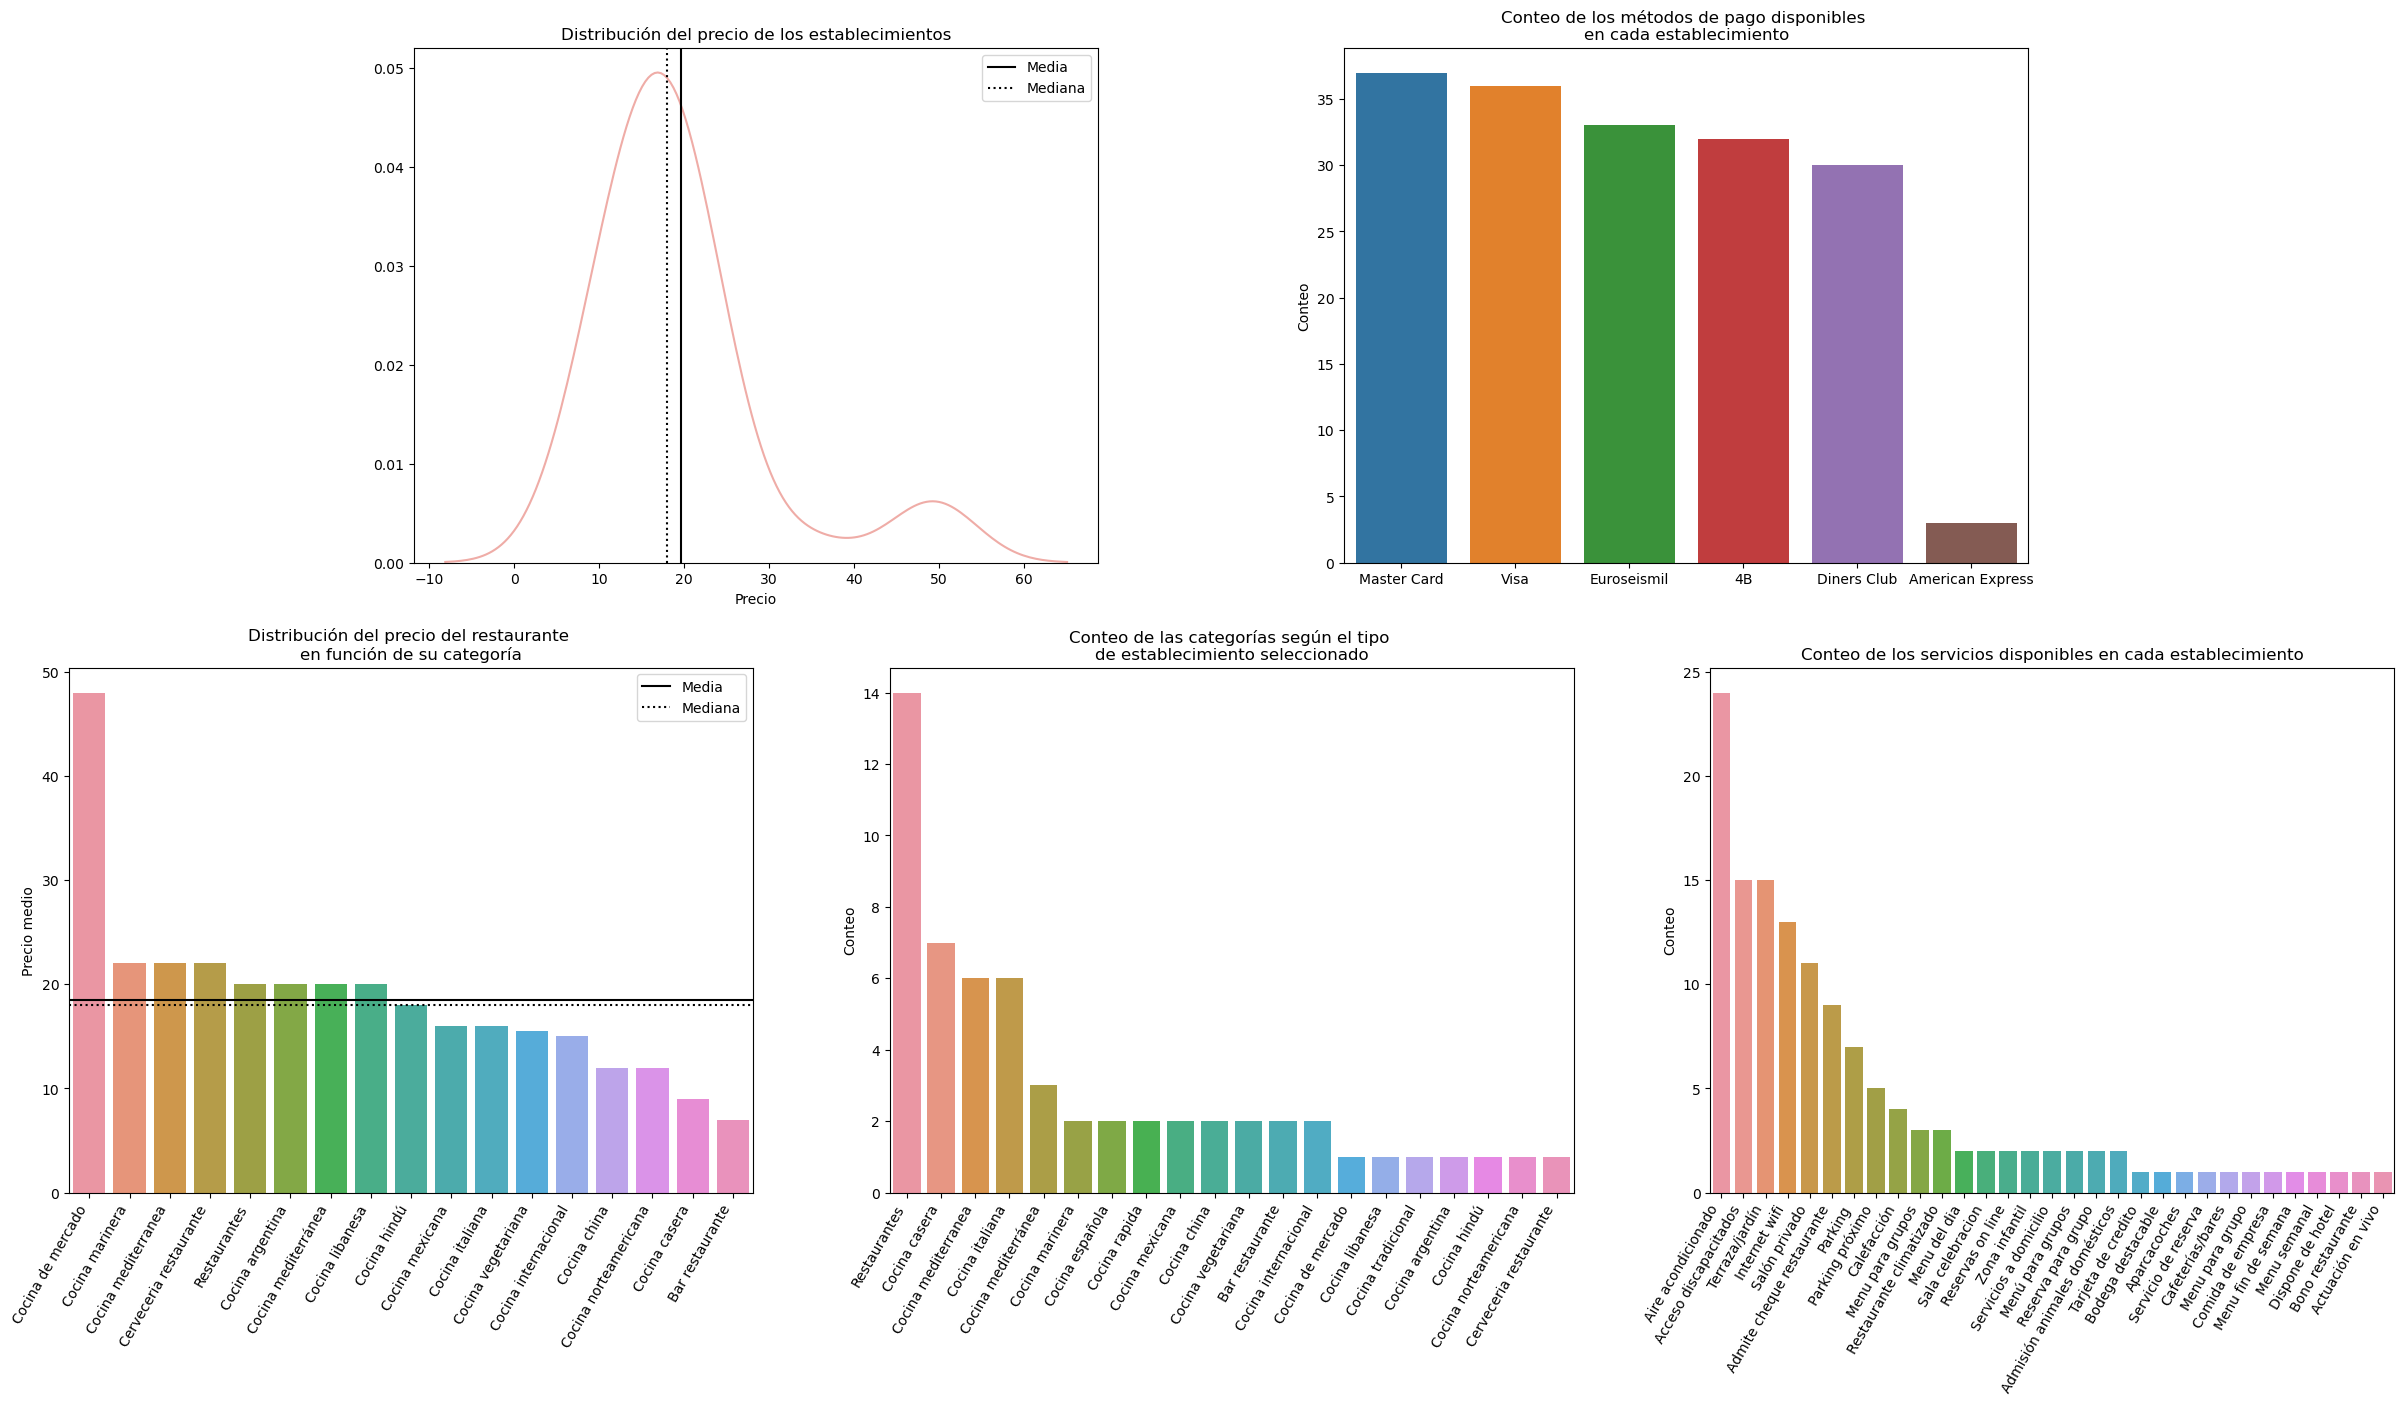

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,15))

# Gráfico 1
consulta = "SELECT Precio_medio FROM Tipo_establecimiento"
datos = pd.read_sql_query(consulta, con)
datos["Precio_medio"] = datos["Precio_medio"].replace("NULL", pd.np.nan)
datos = datos.dropna(subset=["Precio_medio"])
datos["Precio_medio"] = datos["Precio_medio"].str.replace("€", "")
datos["Precio_medio"] = datos["Precio_medio"].str.replace(",", ".")
datos["Precio_medio"] = datos["Precio_medio"].astype(float)

sns.kdeplot(data=datos, x="Precio_medio", color="#EB9891", alpha=.8, ax=axs[0, 0])
axs[0, 0].axvline(x=datos["Precio_medio"].mean(), color="black", linestyle="solid", label="Media")
axs[0, 0].axvline(x=datos["Precio_medio"].median(), color="black", linestyle="dotted", label="Mediana")
axs[0, 0].set_xlabel("Precio")
axs[0, 0].set_ylabel(None)
axs[0, 0].set_title("Distribución del precio de los establecimientos")
axs[0, 0].ticklabel_format(style="plain", axis="both", useLocale=True)
axs[0, 0].legend()

# Gráfico 2
consulta = "SELECT Método_de_pago_1, Método_de_pago_2, Método_de_pago_3, Método_de_pago_4, Método_de_pago_5 FROM Tipo_establecimiento"
datos = pd.read_sql_query(consulta, con)
datos = pd.concat([datos['Método_de_pago_1'], datos['Método_de_pago_2'], datos['Método_de_pago_3'], datos['Método_de_pago_4'], datos['Método_de_pago_5']], ignore_index=True)
datos = datos.replace("NULL", pd.np.nan)
datos = datos.dropna()
datos = pd.DataFrame(datos)
datos = datos.rename(columns={0: 'Métodos'})

sns.countplot(x = 'Métodos', data=datos, order=datos["Métodos"].value_counts().index, ax=axs[0, 1])
axs[0, 1].set_title('Conteo de los métodos de pago disponibles \nen cada establecimiento')
axs[0, 1].set_xlabel(None)
axs[0, 1].set_ylabel('Conteo')

# Gráfico 3
consulta = "SELECT Servicio_1, Servicio_2, Servicio_3, Servicio_4, Servicio_5 FROM Tipo_establecimiento"
datos = pd.read_sql_query(consulta, con)
datos = pd.concat([datos['Servicio_1'], datos['Servicio_2'], datos['Servicio_3'], datos['Servicio_4'], datos['Servicio_5']], ignore_index=True)
datos = datos.replace("NULL", pd.np.nan)
datos = datos.dropna()
datos = pd.DataFrame(datos)
datos = datos.rename(columns={0: 'Servicios'})

sns.countplot(x = 'Servicios', data=datos, order=datos["Servicios"].value_counts().index, ax=axs[1, 2])
axs[1, 2].set_xticklabels(axs[1, 2].get_xticklabels(), rotation=60, ha="right")
axs[1, 2].set_title('Conteo de los servicios disponibles en cada establecimiento')
axs[1, 2].set_xlabel(None)
axs[1, 2].set_ylabel('Conteo')

# Gráfico 4
consulta = "SELECT Actividad FROM Tipo_establecimiento"
datos = pd.read_sql_query(consulta, con)
datos = datos.replace("NULL", pd.np.nan)
datos = datos.dropna()
datos = pd.DataFrame(datos)

sns.countplot(x = 'Actividad', data=datos, order=datos["Actividad"].value_counts().index, ax=axs[1, 1])
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=60, ha="right")
axs[1, 1].set_title('Conteo de las categorías según el tipo \nde establecimiento seleccionado')
axs[1, 1].set_xlabel(None)
axs[1, 1].set_ylabel('Conteo')

# Gráfico 5
consulta = "SELECT Precio_medio, Actividad FROM Tipo_establecimiento"
datos = pd.read_sql_query(consulta, con)
datos = datos.replace("NULL", pd.np.nan)
datos = datos.dropna()
datos = pd.DataFrame(datos)
datos["Precio_medio"] = datos["Precio_medio"].str.replace("€", "")
datos["Precio_medio"] = datos["Precio_medio"].str.replace(",", ".")
datos["Precio_medio"] = datos["Precio_medio"].astype(float)
datos = datos.groupby('Actividad')['Precio_medio'].median().reset_index(name='Precio_medio')
datos['n'] = datos['Actividad'].notnull().sum()
datos_sorted = datos.sort_values('Precio_medio', ascending=False)

sns.barplot(x='Actividad', y='Precio_medio', data=datos, order=datos_sorted['Actividad'], ax=axs[1, 0])
axs[1, 0].axhline(y=datos["Precio_medio"].mean(), color="black", linestyle="solid", label="Media")
axs[1, 0].axhline(y=datos["Precio_medio"].median(), color="black", linestyle="dotted", label="Mediana")
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=60, ha="right")
axs[1, 0].set_title('Distribución del precio del restaurante \nen función de su categoría')
axs[1, 0].set_xlabel(None)
axs[1, 0].set_ylabel('Precio medio')
axs[1, 0].legend()

# Ajustes del grid
axs[0][2].set_visible(False)
axs[0][0].set_position([0.24,0.53,0.228,0.343])
axs[0][1].set_position([0.55,0.53,0.228,0.343])